Look at the Tubulin 1 data from the SMLM comparison challenge

In [1]:
import os 
import numpy as np
from PIL import Image
# --- LocaHBay ---
from locahbay import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# read in tubulin frame
dir_tub = os.path.join(UT.dat_dir(), 'tub1') # tubulin directory
f_frame = os.path.join(dir_tub, '02386.tif')

im = Image.open(f_frame)
imarr = np.array(im)

In [5]:
# read in ground truth 
f_truth = os.path.join(dir_tub, 'fluoro_truth', 'frames', '02386.csv')
x, y, z, I = np.loadtxt(f_truth, delimiter=',', skiprows=1, unpack=True, usecols=[2,3,4,5]) # positions in nm
print('%i fluorophores' % len(x))
# convert to pixels
xpix, ypix = x/150., y/150.

44 fluorophores


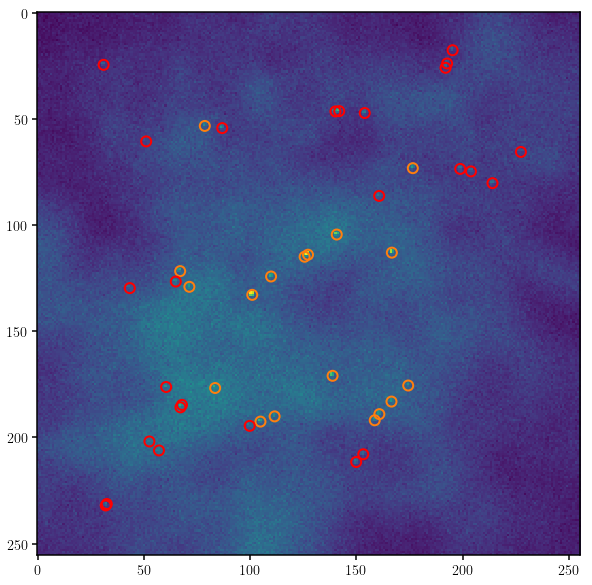

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(imarr)
high = (I > np.average(I))
plt.scatter(xpix[high], ypix[high], s=100, facecolors='none', edgecolor='C1', linewidths=2)
low = (I <= np.average(I))
plt.scatter(xpix[low], ypix[low], s=100, facecolors='none', edgecolor='r', linewidths=2)

In [29]:
from astropy.convolution import convolve, Gaussian2DKernel

In [34]:
truth_matrix = np.zeros_like(imarr)
for i, x, y in zip(range(len(xpix)), np.round(xpix), np.round(ypix)):
    truth_matrix[int(x),int(y)] = I[i]

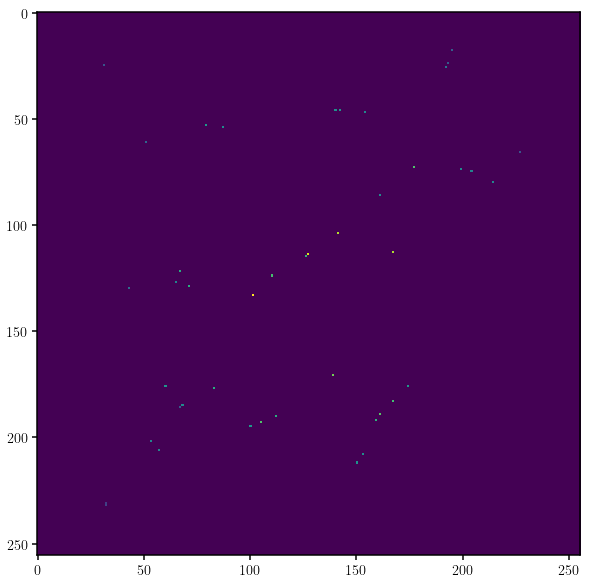

In [38]:
fig = plt.figure(figsize=(10,10))
plt.imshow(truth_matrix.T)

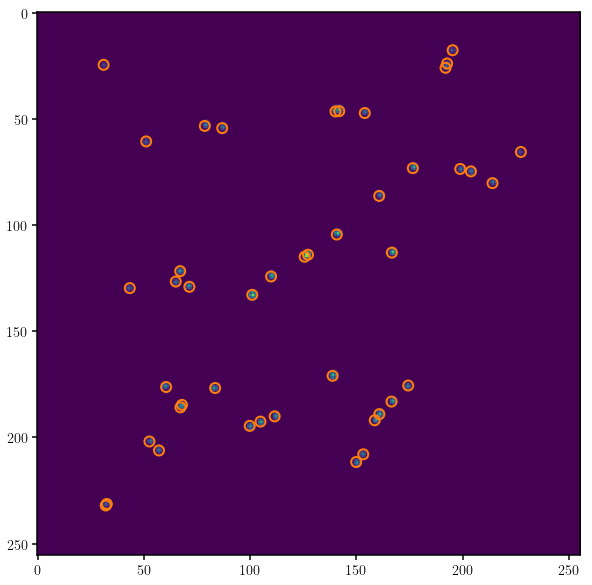

In [42]:
kern1 = Gaussian2DKernel(1)
truth_psf = convolve(truth_matrix, kern1)
fig = plt.figure(figsize=(10,10))
plt.imshow(truth_psf.T)
plt.scatter(xpix, ypix, s=100, facecolors='none', edgecolor='C1', linewidths=2)

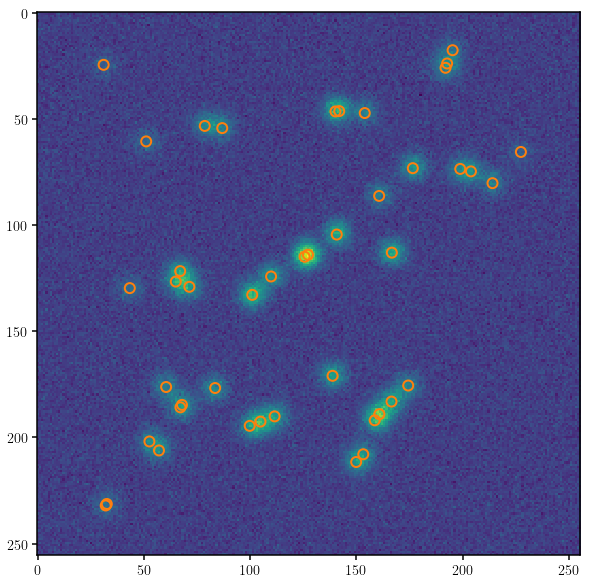

In [51]:
kern1 = Gaussian2DKernel(4.2)
truth_psf = convolve(truth_matrix, kern1)
fig = plt.figure(figsize=(10,10))
plt.imshow(truth_psf.T + 2.*np.random.randn(truth_psf.shape[1], truth_psf.shape[0]))
plt.scatter(xpix, ypix, s=100, facecolors='none', edgecolor='C1', linewidths=2)